## Keşifsel Veri Analizi (EDA) ve Derin Öğrenme Modeli

Proje kapsamında MNIST veri seti için keşifsel veri analizi aşağıdaki gibi yapılmıştır. Veri işleyiş yöntemleri burada görülebilir. Ayrıca scikit-learn kütüphanesindeki MLP (Multi-layer Perceptron) Classifier modeli ile veriler eğitilmiş ve %99.7 tahmin doğruluğuna ulaşılmıştır.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
train.shape

(42000, 785)

In [4]:
# veri temizleme
train.isna().any().any()

# veri ve etiketlerini alma
train_data = train.loc[:, "pixel0":]
train_label = train.loc[:, "label"]

# verileri normalize etme
train_data = train_data/255.0
test = test/255.0

Veri setindeki örnek bir rakam veriler normalize edildikten sonra aşağıdaki gibi elde edilmiştir.

Image Label: 3


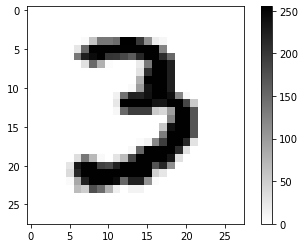

In [5]:
digit_array = train.loc[9, "pixel0":]
arr = np.array(digit_array) 

image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("Image Label: {}".format(train.loc[9, "label"]))

Veri standardizasyonu;

In [6]:
from sklearn.preprocessing import StandardScaler

standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(train_data)
standardized_data.shape

(42000, 784)

Kovaryans matrisi;

In [7]:
cov_matrix = np.matmul(standardized_data.T, standardized_data)
cov_matrix.shape

(784, 784)

Özdeğer ve Özvektörler;

In [8]:
from scipy.linalg import eigh

lambdas, vectors = eigh(cov_matrix, eigvals=(782, 783))
vectors.shape

(784, 2)

In [9]:
vectors = vectors.T
vectors.shape

(2, 784)

Birim vektörler;

In [10]:
new_coordinates = np.matmul(vectors, standardized_data.T)
print(new_coordinates.shape)
new_coordinates = np.vstack((new_coordinates, train_label)).T

(2, 42000)


In [11]:
df_new = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_new.head()

,f1,f2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


Veri dağılımı;

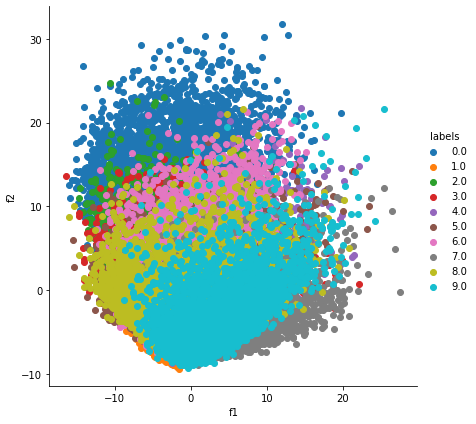

In [12]:
sns.FacetGrid(df_new, hue="labels", height=6).map(plt.scatter, "f1", "f2").add_legend()
plt.show()

Veri histogramı;

Veri setinde diğerlerinden daha fazla sayıda 1 olduğu görülüyor.

[4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]


/opt/homebrew/Caskroom/miniforge/base/envs/tf_m1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


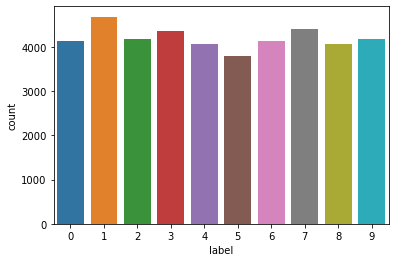

In [13]:
sns.countplot(train.label)
print(list(train.label.value_counts().sort_index()))

## Multi-Layer Perceptron Classifier Derin Öğrenme Modeli ile Veri Eğitimi ve Sonuçları

Görüleceği üzere tahmin oranı %99.7 olarak çıkıyor.

In [14]:
x = train.drop(['label'],axis=1).values
y = train['label'].values.flatten()

from sklearn.model_selection import train_test_split
x_train,x_dev, y_train,  y_dev = train_test_split(x,y,random_state=42)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import scipy

clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000,),  random_state=1 ) 
best_model = clf.fit(x/255.0, y)

train['label_predicted'] =  best_model.predict(x/255.0)
train['valid_predicted'] = train.apply(lambda row: row['label_predicted']==row['label'], axis=1)

print('Training Accuracy: {:3.2f} %'.format(best_model.score(x,y)*100))
y_test_pred = best_model.predict(x)


Training Accuracy: 99.70 %


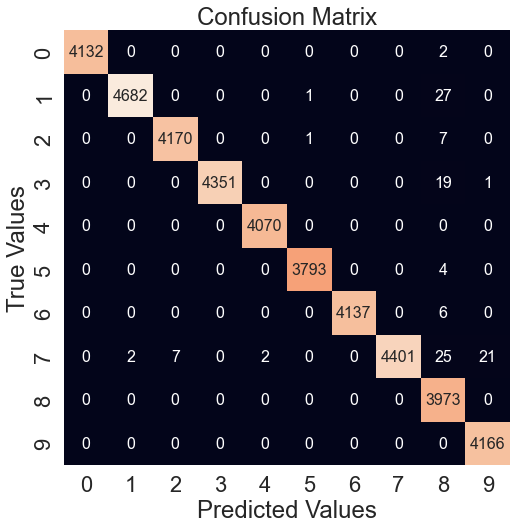

Test Accuracy: 0.9970238095238095


In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, y_test_pred)
fig = plt.figure(figsize=(8,8))

sns.set(font_scale=2)
sns.heatmap(mat.T, annot=True, cbar = False, annot_kws={'size': 16}, fmt='.0f')
    
plt.title("Confusion Matrix")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

from sklearn.metrics import accuracy_score
print("Test Accuracy: " + accuracy_score(y, y_test_pred).__str__())

Yukarıda görülen confusion matriste değerler ne kadar orta çaprazda toplanırsa o kadar doğru tahmin yaptığımızı gösteriyor ve bakıldığında, köşelerin 0 ya da 0'a çok yakın değerler olduğu ve bu da uygulamış olduğumuz MLP Classifier algoritmasının verilerimiz için gayet iyi çalıştığını gösteriyor.